### Bag of Words and TF-IDF 

In [1]:
import re

pattern = r"^[a-zA-Z]"
test_strings = ["Hello123", "123Hello", "Test", "456"]

for string in test_strings:
    if re.match(pattern, string):
        print(f"'{string}' matches the pattern")
    else:
        print(f"'{string}' does not match the pattern")


'Hello123' matches the pattern
'123Hello' does not match the pattern
'Test' matches the pattern
'456' does not match the pattern


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [3]:
df=pd.read_csv("SPAM_text_message_Data.csv")

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['Category'].replace({'ham':0 , 'spam':1}, inplace=True)

In [6]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data = {'Category': ['spam','ham'],
        'number':[len(df.loc[df.Category==1]),
                  len(df.loc[df.Category==0])]
       }

In [8]:
data= pd.DataFrame(data,columns=['Category','number'])

<function matplotlib.pyplot.show(close=None, block=None)>

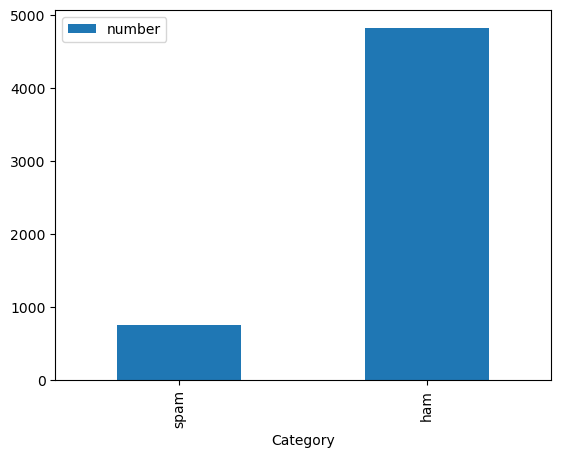

In [9]:
# binary classification which is here is inbalance
data.plot(x='Category', y='number', kind='bar')
plt.show

In [10]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
#cleaning dataset
stemmer = PorterStemmer()
corpus=[]
for w in range(len(df['Message'])):
    #print(w)
    msg = df['Message'][w]
    msg= re.sub('[^a-zA-Z]',' ',msg)
    msg = re.sub("\b[a-zA-Z]\b", '' , msg)
    msg = msg.lower()
    msg = msg.split()
    msg = [stemmer.stem(word) for word in msg if not word in set(stopwords.words('english'))]
    msg = " ".join(msg)
    corpus.append(msg)
    #print(msg)

In [12]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [13]:
#create word vector
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf.fit(corpus)

TfidfVectorizer()

In [14]:
print(tf.vocabulary_)

{'go': 2171, 'jurong': 2827, 'point': 4091, 'crazi': 1169, 'avail': 379, 'bugi': 738, 'great': 2245, 'world': 6135, 'la': 2932, 'buffet': 736, 'cine': 964, 'got': 2208, 'amor': 190, 'wat': 5957, 'ok': 3760, 'lar': 2960, 'joke': 2794, 'wif': 6056, 'oni': 3785, 'free': 2007, 'entri': 1673, 'wkli': 6101, 'comp': 1058, 'win': 6067, 'fa': 1791, 'cup': 1220, 'final': 1890, 'tkt': 5536, 'st': 5103, 'may': 3276, 'text': 5420, 'receiv': 4402, 'question': 4319, 'std': 5131, 'txt': 5695, 'rate': 4364, 'appli': 262, 'dun': 1551, 'say': 4651, 'earli': 1568, 'hor': 2477, 'alreadi': 163, 'nah': 3532, 'think': 5468, 'goe': 2175, 'usf': 5811, 'live': 3070, 'around': 302, 'though': 5485, 'freemsg': 2013, 'hey': 2408, 'darl': 1267, 'week': 5992, 'word': 6129, 'back': 414, 'like': 3042, 'fun': 2059, 'still': 5152, 'tb': 5367, 'xxx': 6202, 'chg': 922, 'send': 4721, 'rcv': 4375, 'even': 1722, 'brother': 710, 'speak': 5037, 'treat': 5638, 'aid': 118, 'patent': 3936, 'per': 3972, 'request': 4473, 'mell': 3306

In [15]:
X = tf.transform(corpus).toarray()
Y = df['Category']

In [16]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.20, random_state=0)

In [17]:
#tran model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [18]:
#test
y_pred = model.predict(X_test)

In [19]:
# compute metrics
from sklearn.metrics import confusion_matrix
confusion_m= confusion_matrix(y_test,y_pred)

In [20]:
confusion_m

array([[955,   0],
       [ 34, 126]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [22]:
acc

0.9695067264573991

In [23]:
prec

1.0

In [24]:
rec

0.7875